# A calculation of the order of convergence when the limit value is unknown

## _This problem is an optional extension of the previous exercise sheets_

Assume we have determined numerically an approximate value $f_{\Delta x}$ of a function (for example, of a derivative) using a numerical mesh with grid cells $\Delta x$. We say that a numerical approximation converges toward a limit value $f_{lim}$ with $m$-order approximation if we can write to leading order for all $\Delta x$ which are sufficiently small.

$$f_{\Delta x} = f_{lim} + A(\Delta x)^m  \tag{1}$$

with $A$ a constant. If the global domain in $x$ has length $L$ and has been divided into $N$ intervals (so that  $\Delta x = L/N$), then we have:

$$f_N = f_{lim} + A\left(\frac{L}{N}\right)^m  \tag{2}$$

From there it is straightforward to obtain:

$$\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}} = \frac{4^{m}-2^{m}}{2^{m}-1} = 2^{m}  \tag{3}$$

or, in other words,

$$m = \log\left(\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}}\right)/\log2  \tag{4}$$

with log the natural logarithm. Thus, if we obtain a numerical value for a function at a given point with increasing order of approximation using $N$, $2N$, and $4N$ intervals in a given domain, we can calculate the order $m$ of the approximation using Eq. (4) without having to know in advance the exact analytical limit value. Test this method with `np.deriv_cent` and `np.deriv_4tho` and fill in `nm.order_conv`.

In [1]:
import numpy as np
import importlib
from nm_lib import nm_lib as nm
importlib.reload(nm)
import matplotlib.pyplot as plt

import import_ipynb
import ex_1b_v1_5 as ex1b

importing Jupyter notebook from ex_1b_v1_5.ipynb


Check for zero in denominator
4tho True
cent True


/Users/juanms/Numerical_sim_course/students_2023/phd/Jakob_Borg/nm_lib/nm_lib/nm_lib.py:71: RuntimeWarning: divide by zero encountered in divide
  return np.log2((hh4[::4]-hh2[::2])/(hh2[::2]-hh))
/Users/juanms/Numerical_sim_course/students_2023/phd/Jakob_Borg/nm_lib/nm_lib/nm_lib.py:71: RuntimeWarning: divide by zero encountered in log2
  return np.log2((hh4[::4]-hh2[::2])/(hh2[::2]-hh))


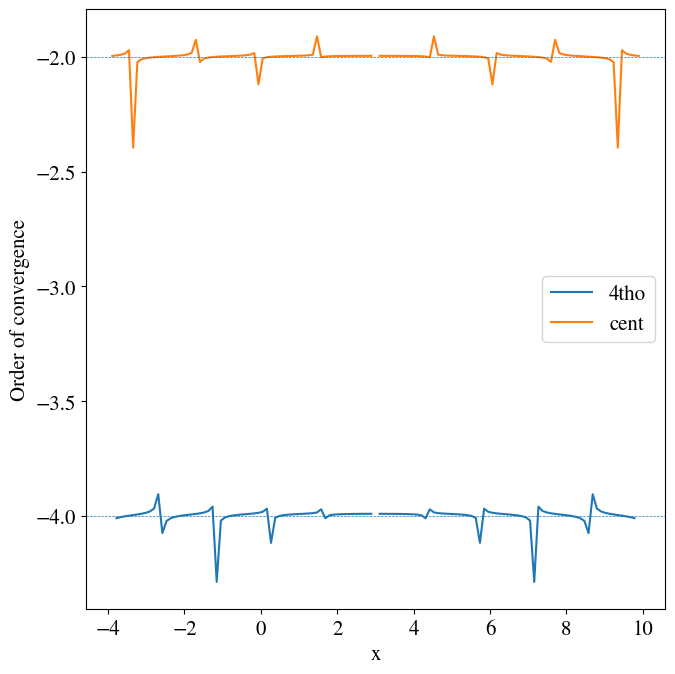

In [2]:
N = 128
nints = [N, 2*N, 4*N]
hp_4tho = []
hp_cent = []
for nint in nints:
    xx, dx = ex1b.get_xx(nint)
    hh = ex1b.get_h(xx)
    hp_4tho.append(nm.deriv_4tho(xx, hh, method="roll"))
    hp_cent.append(nm.deriv_cent(xx, hh, method="roll"))

print("Check for zero in denominator")
print("4tho", np.any(np.isclose(hp_4tho[1][::2]-hp_4tho[0],0)))
print("cent", np.any(np.isclose(hp_cent[1][::2]-hp_cent[0],0)))

xx, dx = ex1b.get_xx(N)
fig, ax = plt.subplots()
ax.plot(xx[2:-2], nm.order_conv(*hp_4tho)[2:-2],label="4tho")
ax.plot(xx[1:-1], nm.order_conv(*hp_cent)[1:-1],label="cent")
ax.axhline(y=-2,lw=0.5,ls="--")
ax.axhline(y=-4,lw=0.5,ls="--")
ax.legend()
ax.set_ylabel("Order of convergence")
ax.set_xlabel("x");

### Comments
In my implementation of `nm_lib.order_conv` I've just used the base 2 logarithm instead of the natural, and sliced every 4th and 2nd element for `hh4` and `hh2` to get it on the same shape as `hh`. Here I've made a script testing the implementation on the 4th order and central differentiation schemes. I expected to get an array with values close to four and two for the two respective cases, but instead I get negative values. Im not sure why this is the case, but I suspect it may be caused by the slicing. Numerically it makes sense, as we take the log of a small value, but from the derivation of Eq. 4 I expected it to be positiv.

I've plotted the order of convergence against the x-coordinate here, removing the ill-behaved boundaries. The middle point is missing as the denominator in Eq. 4 is very close to being zero here, and thus the value we want to take the logarithm of approaches `inf`.

<span style="color:green">JMS</span>.

<span style="color:blue">GREAT JOB! What I like about this method is that it also shows the spatial error. Great that you realized that you have to remove n number of the points at the boundaries depending on the method. If I'm not mistaken the -2 is because it comes from $1/dx^2$. Does it make sense to you? </span>.
